In [1]:
import os
from pathlib import Path
import shutil
from distutils.dir_util import copy_tree

import pandas as pd
import json
import time
import datetime

from PIL import Image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import scipy.stats
import itertools

# https://github.com/qwirky-yuzu/COCO-to-YOLO/blob/main/coco_to_yolo.py
# https://github.com/pylabel-project/samples/blob/main/coco2yolov5.ipynb
try:
    import pylabel
except:
    !pip install pylabel
finally:
    from pylabel import importer

import matplotlib.patches as patches
import matplotlib
import matplotlib.colors as mcolors

plt.rcParams.update({'font.size': 22})
style_label = 'fivethirtyeight' #plt.style.available 

In [3]:
import labelutilits as utl

In [4]:
try:
    import dsatools 
except:
    !pip install dsatools
finally:
    import dsatools.utilits as ut

In [5]:
path = os.getcwd() 
print(utl.list_dirs(path))
anno_path = utl.get_anno_path(path,'train')
anno_path

['labelutilits', 'part1', 'part2', 'part3', 'part4', 'part5', 'part6', 'part7', 'part8', 'part9', 'train']


'D:\\ASBEST!\\ALLVEINS\\train\\annotation.json'

In [8]:
anno = utl.Annotation(anno_path).reset_annotation().print_info().\
        set_cat_names(new_names = ['stones', 'asbest']).\
        filter_cat(cat_ids=[2]).\
        replace_image_dir().reset_annotation().\
        save_anno('veins_anno.json',replace_path=True).print_info()


{'anno_fname': 'annotation.json',
 'anno_number': 4129,
 'anno_path': 'D:\\ASBEST!\\ALLVEINS\\train\\annotation.json',
 'cat_ids': [1, 2],
 'class_names': ['asbest', 'stone'],
 'dataset_name': 'train',
 'fname_example': 'D:\\ASBEST!\\ALLVEINS\\train\\14-02-21_5_1_9_part1.bmp',
 'height': [2048],
 'image_dir_path': 'D:\\ASBEST!\\ALLVEINS\\train',
 'length': 231,
 'supercategory': ['', ''],
 'width': [2592]}
{'anno_fname': 'veins_anno.json',
 'anno_number': 3621,
 'anno_path': 'D:\\ASBEST!\\ALLVEINS\\train\\veins_anno.json',
 'cat_ids': [1],
 'class_names': ['asbest'],
 'dataset_name': 'train',
 'fname_example': 'D:\\ASBEST!\\ALLVEINS\\train\\14-02-21_5_1_9_part1.bmp',
 'height': [2048],
 'image_dir_path': 'D:\\ASBEST!\\ALLVEINS\\train',
 'length': 185,
 'supercategory': [''],
 'width': [2592]}


{'anno_fname': 'annotation.json',
 'anno_number': 4237,
 'anno_path': 'D:\\ASBEST!\\ALLVEINS\\train\\annotation.json',
 'cat_ids': [1, 2],
 'class_names': ['asbest', 'stone'],
 'dataset_name': 'train',
 'fname_example': 'D:\\ASBEST!\\ALLVEINS\\train\\14-02-21_5_1_9_part1.bmp',
 'height': [2048, 3456],
 'image_dir_path': 'D:\\ASBEST!\\ALLVEINS\\train',
 'length': 249,
 'supercategory': ['', ''],
 'width': [2592, 5184]}


In [7]:
anno.anno_path

'D:\\ASBEST!\\ALLVEINS\\train\\veins_anno.json'

In [8]:
class Annotation(utl.Annotation):
    def __init__(self, anno_path, image_dir_path=None):
        super().__init__(anno_path, image_dir_path)
      
  

In [9]:
anno = Annotation(anno_path)
anno.info()


{'cat_ids': [1, 2],
 'class_names': ['asbest', 'stone'],
 'supercategory': ['', ''],
 'width': [2592, 5184],
 'height': [2048, 3456],
 'length': 249,
 'anno_number': 4237,
 'fname_example': 'D:\\ASBEST!\\ALLVEINS\\train\\14-02-21_5_1_9_part1.bmp',
 'image_dir_path': 'D:\\ASBEST!\\ALLVEINS\\train',
 'dataset_name': 'train',
 'anno_path': 'D:\\ASBEST!\\ALLVEINS\\train\\annotation.json',
 'anno_fname': 'annotation.json'}

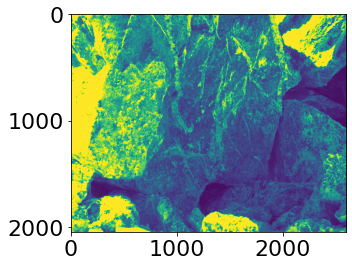

In [10]:
img = anno.get_image(image_id = 1)
plt.imshow(img)

In [11]:
bboxes = anno.get_bboxes(image_id = 1)

In [13]:
bboxes

[[1421.84, 464.95, 58.93, 222.44],
 [1692.01, 130.94, 121.71, 412.77],
 [1463.2, 542.51, 205.2, 431.18],
 [1086.68, 0.0, 59.67, 237.16],
 [745.23, 0.0, 185.59, 287.34],
 [1324.24, 0.0, 78.68, 237.62],
 [1221.0, 215.64, 134.91, 519.44],
 [1333.06, 836.84, 107.48, 553.54],
 [1664.79, 576.08, 142.89, 144.03],
 [1802.64, 702.57, 144.1, 72.54],
 [843.17, 612.81, 65.82, 263.42],
 [1504.0, 194.35, 203.3, 353.84],
 [1197.3, 0.0, 142.77, 182.83],
 [1360.15, 485.73, 73.56, 345.84],
 [1858.2, 0.0, 226.31, 957.63],
 [1043.64, 1353.53, 198.46, 321.85],
 [898.79, 714.26, 53.04, 122.29],
 [1417.96, 1064.86, 209.34, 325.3],
 [872.32, 0.0, 222.04, 1140.96],
 [1436.61, 197.01, 72.97, 255.71],
 [1039.42, 248.44, 46.05, 251.09],
 [1612.64, 932.3, 79.32, 340.76]]

(-0.5, 2591.5, 2047.5, -0.5)

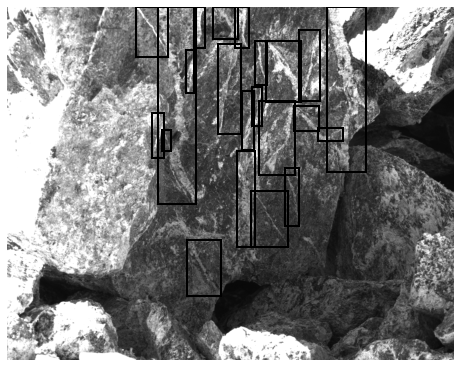

In [14]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

for box in bboxes:
    height = box[3] #- box[1]
    width  = box[2] #- box[0]

    lower_left_corner = (box[0], box[1] )

    bb = patches.Rectangle(lower_left_corner, width ,height, linewidth=2, edgecolor="black", facecolor="none")
    ax.add_patch(bb)
#         ax.text(box[0],box[1], str(int(score*100)/100) , fontsize = 11, fontweight = 'black', color = 'white'  )
ax.imshow(img, 'gray')
ax.axis('off')
#     axs[0,1].set_title('Object Detection')

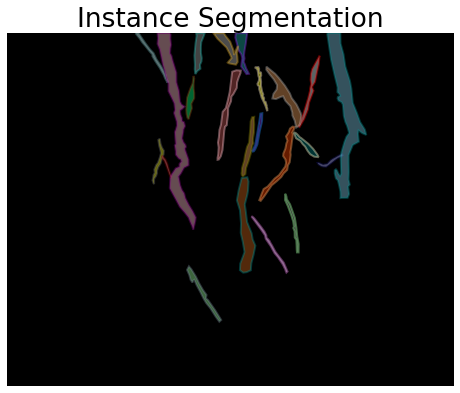

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

# INSTANT SEGMENTATION
colors = list(matplotlib.colors.cnames.keys())
for ann in anno.get_segmentations(image_id = 1):
    edgecolor = np.random.choice(colors, 1)[0]
    facecolor = np.random.choice(colors, 1)[0]
    mask = np.asarray(ann).reshape(-1,2)
    bb = patches.Polygon(mask, linewidth=2, edgecolor=edgecolor, facecolor=facecolor,alpha=0.4)
    ax.add_patch(bb)
ax.imshow(img*0, cmap='gray')
ax.axis('off')
ax.set_title('Instance Segmentation')  
plt.show()